# PRODUCCIÓN DE TORTILLA DE HARINA EN MÉXICO


## 1. Objetivo:
- Conocer el panorama de producción y venta de tortillas de Harina en México.
    
## 2. Desarrollo:


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [170]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [146]:
df= pd.read_csv("Vtas y Prod/producción y vtas crudo.csv")
cons= pd.read_csv("Consumidor/Consumo de tortilla.csv")

In [147]:
df.head(3)

,CODIGO_ACTIVIDAD,ANIO,MES,CLAVE_PRODUCTO,QPP,VPP,QVP,VVP,ESTATUS
0,311110,2013,1,1,97930.0,552751.0,97766.0,551006.0,Cifras definitivas
1,311110,2013,1,2,101016.0,545964.0,100886.0,545162.0,Cifras definitivas
2,311110,2013,1,3,320979.0,1939992.0,318963.0,1929378.0,Cifras definitivas


In [4]:
#Identificar el tipo de datos que tenemos

df.dtypes

CODIGO_ACTIVIDAD     int64
ANIO                 int64
MES                  int64
CLAVE_PRODUCTO       int64
QPP                  int64
VPP                  int64
QVP                  int64
VVP                  int64
ESTATUS             object
dtype: object

In [6]:
#Identificar si hay nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157590 entries, 0 to 157589
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CODIGO_ACTIVIDAD  157590 non-null  int64  
 1   ANIO              157590 non-null  int64  
 2   MES               157590 non-null  int64  
 3   CLAVE_PRODUCTO    157590 non-null  int64  
 4   QPP               108905 non-null  float64
 5   VPP               147650 non-null  float64
 6   QVP               109057 non-null  float64
 7   VVP               147860 non-null  float64
 8   ESTATUS           157590 non-null  object 
dtypes: float64(4), int64(4), object(1)
memory usage: 10.8+ MB


In [32]:
#Obtener solo los registros de Tortilla de harina, la código de 
#actividad es 311811 y la clave del producto 052
cod=df["CODIGO_ACTIVIDAD"] == 311811

In [33]:
clav=df["CLAVE_PRODUCTO"] == 52

In [36]:
trigo=df[cod&clav]
trigo.head()

,CODIGO_ACTIVIDAD,ANIO,MES,CLAVE_PRODUCTO,QPP,VPP,QVP,VVP,ESTATUS
205,311811,2013,1,52,11104.0,311647.0,11061.0,310644.0,Cifras definitivas
1750,311811,2013,2,52,10188.0,287789.0,10129.0,286405.0,Cifras definitivas
3295,311811,2013,3,52,10714.0,305839.0,10649.0,304308.0,Cifras definitivas
4840,311811,2013,4,52,10471.0,302403.0,10422.0,301212.0,Cifras definitivas
6385,311811,2013,5,52,10446.0,303470.0,10406.0,302479.0,Cifras definitivas


In [49]:
#Cambiar el nombre de las columnas
columnas={
    "QPP":"VOL_PROD",
    "VPP":"VALOR_PROD",
    "QVP":"VOL_VTAS",
    "VVP":"VALOR_VTAS"
}

In [50]:
trigo=trigo.rename(columns=columnas)
trigo.head()

,CODIGO_ACTIVIDAD,ANIO,MES,CLAVE_PRODUCTO,VOL_PROD,VALOR_PROD,VOL_VTAS,VALOR_VTAS,ESTATUS
205,311811,2013,1,52,11104.0,311647.0,11061.0,310644.0,Cifras definitivas
1750,311811,2013,2,52,10188.0,287789.0,10129.0,286405.0,Cifras definitivas
3295,311811,2013,3,52,10714.0,305839.0,10649.0,304308.0,Cifras definitivas
4840,311811,2013,4,52,10471.0,302403.0,10422.0,301212.0,Cifras definitivas
6385,311811,2013,5,52,10446.0,303470.0,10406.0,302479.0,Cifras definitivas


In [54]:
#Idetificar los  por años que tienen la tabla
trigo["ANIO"].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [73]:
#Conocer cuales son los regitros que se tienen del 2021
trigo[trigo["ANIO"] == 2021].tail(3)

,CODIGO_ACTIVIDAD,ANIO,MES,CLAVE_PRODUCTO,VOL_PROD,VALOR_PROD,VOL_VTAS,VALOR_VTAS
153160,311811,2021,4,52,8154.0,258568.0,8154.0,258568.0
154705,311811,2021,5,52,8105.0,257671.0,8105.0,257671.0
156250,311811,2021,6,52,8304.0,284728.0,8304.0,284728.0


In [70]:
t2021=trigo[trigo["ANIO"] == 2021]
t2020=trigo[trigo["ANIO"] ==2020]
t2019=trigo[trigo["ANIO"]==2019]
t2018=trigo[trigo["ANIO"]==2018]
t2017=trigo[trigo["ANIO"]==2017]
t2016=trigo[trigo["ANIO"]==2016]
t2015=trigo[trigo["ANIO"]==2015]
t2014=trigo[trigo["ANIO"]==2014]
t2013=trigo[trigo["ANIO"]==2013]

In [87]:
vtas13= t2013[["ANIO", "VALOR_VTAS"]]
vtas13
#df_1=df.drop(columns=["Frutas"])
#df_1

,ANIO,VOL_VTAS
205,2013,11061.0
1750,2013,10129.0


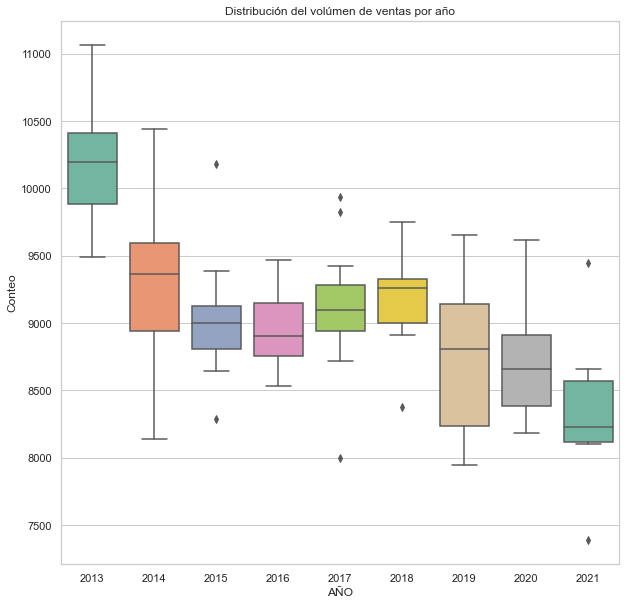

In [138]:
#Conocer la distribución de los datos del Volúmen Ventas

sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))
#sns.boxplot(x=vtas13['VALOR_VTAS']);
ax=sns.boxplot(x=trigo["ANIO"], y=trigo['VOL_VTAS'], palette="Set2");
ax.set(title='Distribución del volúmen de ventas por año', xlabel='AÑO', ylabel='Conteo');

In [119]:
print(f'La media del volumen de ventas en el 2013 fue: {round(t2013["VOL_VTAS"].mean(),2)}, con un std de {round(t2013["VOL_VTAS"].std(),2)}'),
print(f'La media del volumen de ventas en el 2014 fue: {round(t2014["VOL_VTAS"].mean(),2)}, con un std de {round(t2014["VOL_VTAS"].std(),2)}'),
print(f'La media del volumen de ventas en el 2015 fue: {round(t2015["VOL_VTAS"].mean(),2)}, con un std de {round(t2015["VOL_VTAS"].std(),2)}'),
print(f'La media del volumen de ventas en el 2016 fue: {round(t2016["VOL_VTAS"].mean(),2)}, con un std de {round(t2016["VOL_VTAS"].std(),2)}'),
print(f'La media del volumen de ventas en el 2017 fue: {round(t2017["VOL_VTAS"].mean(),2)}, con un std de {round(t2017["VOL_VTAS"].std(),2)}'),
print(f'La media del volumen de ventas en el 2018 fue: {round(t2018["VOL_VTAS"].mean(),2)}, con un std de {round(t2018["VOL_VTAS"].std(),2)}'),
print(f'La media del volumen de ventas en el 2019 fue: {round(t2019["VOL_VTAS"].mean(),2)}, con un std de {round(t2019["VOL_VTAS"].std(),2)}'),
print(f'La media del volumen de ventas en el 2020 fue: {round(t2020["VOL_VTAS"].mean(),2)}, con un std de {round(t2020["VOL_VTAS"].std(),2)}')

La media del volumen de ventas en el 2013 fue: 10201.67, con un std de 422.14
La media del volumen de ventas en el 2014 fue: 9330.58, con un std de 631.55
La media del volumen de ventas en el 2015 fue: 9021.33, con un std de 458.45
La media del volumen de ventas en el 2016 fue: 8952.08, con un std de 296.46
La media del volumen de ventas en el 2017 fue: 9108.92, con un std de 510.94
La media del volumen de ventas en el 2018 fue: 9203.67, con un std de 372.06
La media del volumen de ventas en el 2019 fue: 8763.92, con un std de 522.75
La media del volumen de ventas en el 2020 fue: 8726.42, con un std de 468.61


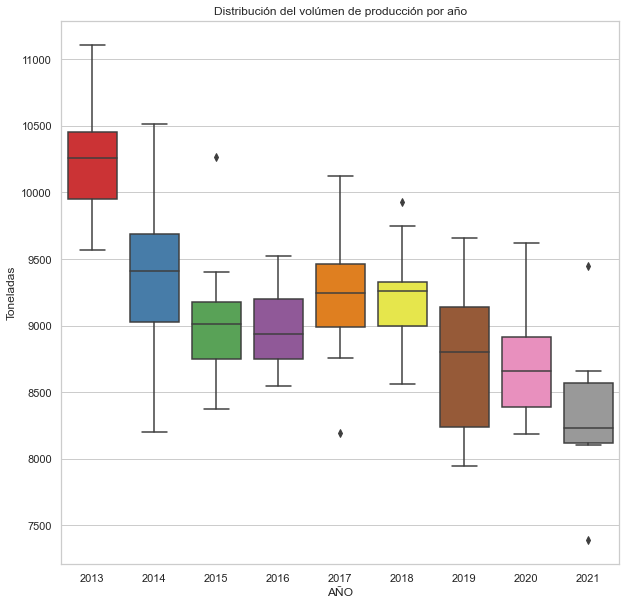

In [316]:
#Conocer la distribución de los datos del Volumen de producción

sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))
ax=sns.boxplot(x=trigo["ANIO"], y=trigo['VOL_PROD'], palette="Set1");
ax.set(title='Distribución del volúmen de producción por año', xlabel='AÑO', ylabel='Toneladas');

In [124]:
print(f'La media del volumen de producción en el 2013 fue: {round(t2013["VOL_PROD"].mean(),2)}, con un std de {round(t2013["VOL_PROD"].std(),2)}'),
print(f'La media del volumen de producción en el 2014 fue: {round(t2014["VOL_PROD"].mean(),2)}, con un std de {round(t2014["VOL_PROD"].std(),2)}'),
print(f'La media del volumen de producción en el 2015 fue: {round(t2015["VOL_PROD"].mean(),2)}, con un std de {round(t2015["VOL_PROD"].std(),2)}'),
print(f'La media del volumen de producción en el 2016 fue: {round(t2016["VOL_PROD"].mean(),2)}, con un std de {round(t2016["VOL_PROD"].std(),2)}'),
print(f'La media del volumen de producción en el 2017 fue: {round(t2017["VOL_PROD"].mean(),2)}, con un std de {round(t2017["VOL_PROD"].std(),2)}'),
print(f'La media del volumen de producción en el 2018 fue: {round(t2018["VOL_PROD"].mean(),2)}, con un std de {round(t2018["VOL_PROD"].std(),2)}'),
print(f'La media del volumen de producción en el 2019 fue: {round(t2019["VOL_PROD"].mean(),2)}, con un std de {round(t2019["VOL_PROD"].std(),2)}'),
print(f'La media del volumen de producción en el 2020 fue: {round(t2020["VOL_PROD"].mean(),2)}, con un std de {round(t2020["VOL_PROD"].std(),2)}')

La media del volumen de producción en el 2013 fue: 10263.5, con un std de 413.53
La media del volumen de producción en el 2014 fue: 9405.83, con un std de 634.99
La media del volumen de producción en el 2015 fue: 9033.5, con un std de 479.75
La media del volumen de producción en el 2016 fue: 8989.67, con un std de 326.9
La media del volumen de producción en el 2017 fue: 9255.67, con un std de 532.47
La media del volumen de producción en el 2018 fue: 9233.5, con un std de 365.65
La media del volumen de producción en el 2019 fue: 8763.92, con un std de 522.75
La media del volumen de producción en el 2020 fue: 8726.42, con un std de 468.61


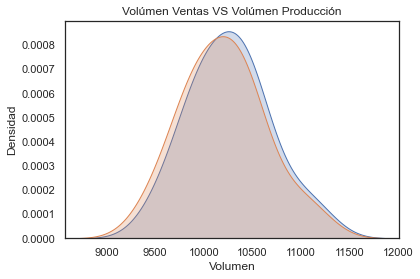

In [187]:
sns.set(style='white')

sns.kdeplot(t2013["VOL_PROD"],shade=True);
ax=sns.kdeplot(t2013["VOL_VTAS"],shade=True);
ax.set(title='Volúmen Ventas VS Volúmen Producción', xlabel='Volumen', ylabel='Densidad');

In [300]:
trigo_group=round(trigo.groupby("ANIO")[["ANIO","VOL_VTAS", "VOL_PROD"]].mean(),2)
trigo_group

,ANIO,VOL_VTAS,VOL_PROD
ANIO,,,
2013,2013,10201.67,10263.50
2014,2014,9330.58,9405.83
2015,2015,9021.33,9033.50
2016,2016,8952.08,8989.67
2017,2017,9108.92,9255.67
2018,2018,9203.67,9233.50
2019,2019,8763.92,8763.92
2020,2020,8726.42,8726.42
2021,2021,8343.83,8343.83


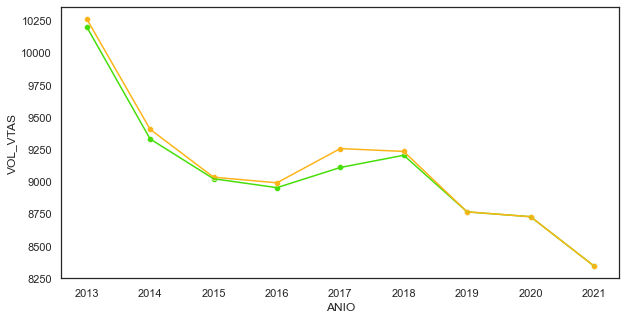

In [315]:
fig = plt.figure(figsize=(10, 5));
sns.scatterplot(x=trigo_group["ANIO"],y=trigo_group['VOL_VTAS'], color="#45DE07");
plt.plot(trigo_group["ANIO"],trigo_group['VOL_VTAS'],c='#45DE07');
sns.scatterplot(x=trigo_group["ANIO"],y=trigo_group['VOL_PROD'], color="#FCB419");
plt.plot(trigo_group["ANIO"],trigo_group['VOL_PROD'], c='#FCB419');
ax.set(title='Volúmen Ventas por año', xlabel='Año', ylabel='Volumen de ventas');

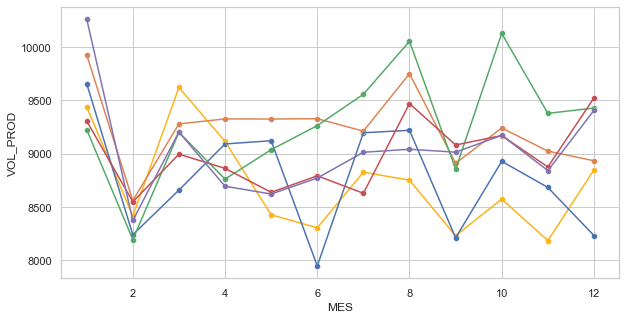

In [373]:
fig = plt.figure(figsize=(10, 5));
sns.scatterplot(x=t2020["MES"],y=t2020['VOL_PROD'], color="#FCB419");
plt.plot(t2020["MES"],t2020['VOL_PROD'], c='#FCB419');
sns.scatterplot(x=t2019["MES"],y=t2019['VOL_PROD']);
plt.plot(t2019["MES"],t2019['VOL_PROD']);
sns.scatterplot(x=t2018["MES"],y=t2018['VOL_PROD']);
plt.plot(t2018["MES"],t2018['VOL_PROD']);
sns.scatterplot(x=t2017["MES"],y=t2017['VOL_PROD']);
plt.plot(t2017["MES"],t2017['VOL_PROD']);
sns.scatterplot(x=t2016["MES"],y=t2016['VOL_PROD']);
plt.plot(t2016["MES"],t2016['VOL_PROD']);
sns.scatterplot(x=t2015["MES"],y=t2015['VOL_PROD']);
plt.plot(t2015["MES"],t2015['VOL_PROD']);
ax.set(title='Volúmen Ventas por mes', xlabel='Mes', ylabel='Volumen de ventas');

## BOOTSTRAP

In [283]:
vtas = trigo['VOL_VTAS']

means = []

for i in range(100_000):
    sample = vtas.sample(n=50, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

In [293]:
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.95)

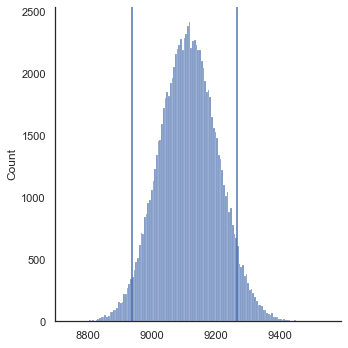

In [294]:
sns.displot(serie_means);
plt.axvline(limite_inferior);
plt.axvline(limite_superior);

In [289]:
print(f'la simetria de nuestos promedios muestrales es de: {serie_means.skew()} y {serie_means.kurtosis()}')
#Sacar la simetria si sale 0 es que las colas son muy cortas quiere decir que tiene buena simetria
print(f'Error estandar: {serie_means.std()}')

la simetria de nuestos promedios muestrales es de: 0.04925446756852741 y -0.020641188207747074
Error estandar: 92.44144932847303


In [317]:
vtas13 = t2013['VOL_VTAS']

means = []

for i in range(100_000):
    sample = vtas13.sample(n=50, replace=True)
    means.append(sample.mean())
    
t2013_means = pd.Series(means)

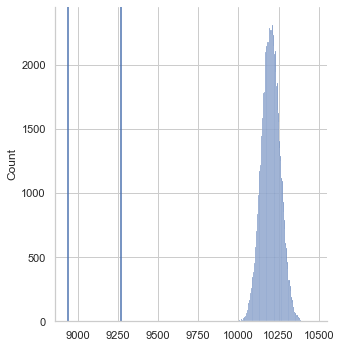

In [318]:
sns.displot(t2013_means);
plt.axvline(limite_inferior);
plt.axvline(limite_superior);

Correlación entre volumen de producción y ventas: 0.9957161395474396


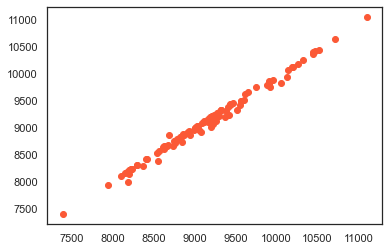

In [169]:
plt.scatter(trigo["VOL_PROD"],trigo["VOL_VTAS"], c='#FB5936');
#plt.plot(trigo["VOL_PROD"],trigo["VOL_VTAS"], c='#8D8D8D');
print(f'Correlación entre volumen de producción y ventas: {trigo["VOL_PROD"].corr(trigo["VOL_VTAS"])}')